In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./fraude_tc.csv',
    dtype={
        'repeat_retailer':int,
        'used_chip':int,
        'used_pin_number':int,
        'online_order':int,
        'fraud':int
    }
)

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
df.shape

(1000000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int32  
 4   used_chip                       1000000 non-null  int32  
 5   used_pin_number                 1000000 non-null  int32  
 6   online_order                    1000000 non-null  int32  
 7   fraud                           1000000 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 42.0 MB


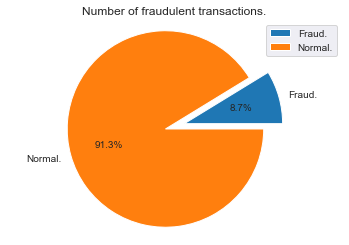

In [7]:
fraud = df.fraud.sum()
no_fraud = df.shape[0] - fraud
data = [fraud, no_fraud]
my_labels = ['Fraud.', 'Normal.']
plt.pie(data,labels=my_labels,autopct='%1.1f%%', explode=(0, 0.2))
plt.title('Number of fraudulent transactions.')
plt.legend()
plt.axis('equal')
plt.show()

In [8]:
def calculate_3_sigmas(serie, only_positive=True):
    """
    Aplica la regla de las 3 sigmas a una Serie para obtener el rango en el que un valor no es considerado como outlier.
    :param serie: Serie a evaluar.
    :param only_positive: Define si el rango debe aceptar valores negativos o no.
    :return: Una tupla con los valores mínimo y máximo del rango.
    """
    min_val = serie.mean() - (3 * serie.std())
    max_val = serie.mean() + (3 * serie.std())
    if only_positive and min_val < 0:
        min_val = 0
    return min_val, max_val

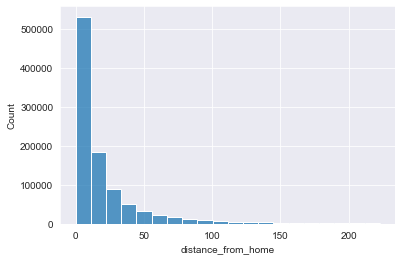

In [9]:
range_dist_home = calculate_3_sigmas(df.distance_from_home)
sns.histplot(data=df, x='distance_from_home', binrange=range_dist_home, bins=20)
plt.show()

In [10]:
df.distance_from_home[df.distance_from_home > range_dist_home[1]].count()

13324

In [11]:
df.distance_from_home[(df.distance_from_home > range_dist_home[1]) & (df.fraud == 1)].count()

5894

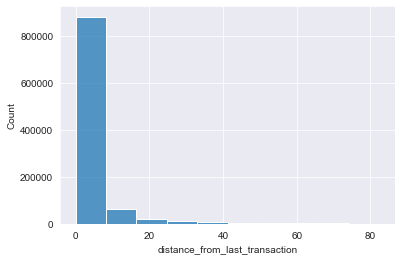

In [12]:
range_dist_last_trans = calculate_3_sigmas(df.distance_from_last_transaction)
sns.histplot(data=df, x='distance_from_last_transaction', binrange=range_dist_last_trans, bins=10)
plt.show()

In [13]:
df.distance_from_last_transaction[df.distance_from_last_transaction > range_dist_last_trans[1]].count()

7099

In [14]:
df.distance_from_last_transaction[(df.distance_from_last_transaction > range_dist_last_trans[1]) & (df.fraud == 1)].count()

3436

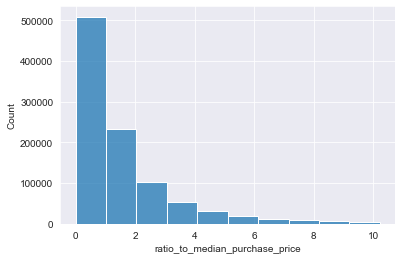

In [15]:
range_ratio_purchase = calculate_3_sigmas(df.ratio_to_median_purchase_price)
sns.histplot(data=df, x='ratio_to_median_purchase_price', binrange=range_ratio_purchase, bins=10)
plt.show()

In [16]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='Count'>

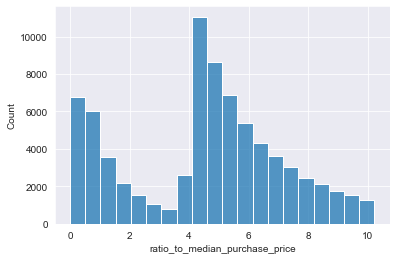

In [21]:
sns.histplot(data=df[df.fraud==1], x='ratio_to_median_purchase_price', binrange=range_ratio_purchase, bins=20)